# IST 5520 Competition Problem (HW 11)
## By: Sayantan Majumdar and Dawit Wolday Asfaw
### Contributions: 

#### Sayantan- Model implementation, Hyperparameter Tuning; Dawit- Data transformation, Model comparison

## 1. Data Exploration

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('Data/train_data.csv')
test_df = pd.read_csv('Data/test_data.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,3220.0,0.099854,0.285808,0.0,0.000,0.000,0.00000,4.340
word_freq_address,3220.0,0.219792,1.329902,0.0,0.000,0.000,0.00000,14.280
word_freq_all,3220.0,0.284391,0.504691,0.0,0.000,0.000,0.43000,4.540
word_freq_3d,3220.0,0.041627,1.010729,0.0,0.000,0.000,0.00000,40.130
word_freq_our,3220.0,0.306783,0.654040,0.0,0.000,0.000,0.37000,10.000
word_freq_over,3220.0,0.100839,0.289473,0.0,0.000,0.000,0.00000,5.880
word_freq_remove,3220.0,0.112981,0.402128,0.0,0.000,0.000,0.00000,7.270
word_freq_internet,3220.0,0.108127,0.414894,0.0,0.000,0.000,0.00000,11.110
word_freq_order,3220.0,0.087357,0.255191,0.0,0.000,0.000,0.00000,2.590
word_freq_mail,3220.0,0.239550,0.661345,0.0,0.000,0.000,0.15000,18.180


In [5]:
train_df['class'].value_counts()

0    1951
1    1269
Name: class, dtype: int64

In [6]:
pd.crosstab(index=train_df['class'], columns="Percent") * 100 / pd.crosstab(index=train_df['class'], columns="Percent").sum()

col_0,Percent
class,
0,60.590062
1,39.409938


We see that there is a class imbalance issue

## 2. Minority Class Oversampling

In [7]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

In [8]:
random_state = 0

In [9]:
y = train_df['class'].copy()
X = train_df.drop(columns='class')

In [10]:
ros = RandomOverSampler(random_state=random_state)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [11]:
y_unique, counts = np.unique(y_resampled, return_counts=True)
counts = counts.astype(np.float64)
counts *= 100 / y_resampled.size
y_unique, counts

(array([0, 1], dtype=int64), array([50., 50.]))

We see that there are 50% positive class (1) and 50% negative class (0) compared to the earlier ~40% and ~60%, respectively. However, this strategy introduces duplicates and may bias the validation metrics. So, we do not use this oversampled data in the next step.

## 3. Dimensionality Reduction
### 3.1 Correlation Analysis

In [12]:
full_df = X_resampled.copy()
full_df['class'] = y_resampled

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

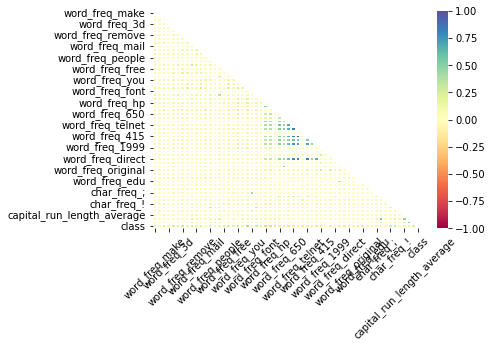

In [14]:
# Correlation heatmap
corr = full_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='Spectral', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)

plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.show()

In [15]:
corr[~((np.round(corr['class'], 1) >= 0.1) | (np.round(corr['class'], 1) <= -0.1))]['class'] 

word_freq_address   -0.042142
word_freq_3d         0.040828
word_freq_will       0.015313
word_freq_parts     -0.037109
Name: class, dtype: float64

From the correlation analysis, we observe that there is neglible correlation between the predictors themselves (which is good). However, we find that the above four features have very little correlation with 'class'. So, we could drop these predictors.

### 3.2 Principal Component Analysis

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#### 3.2.1 Training Data Normalization

In [11]:
scaler = MinMaxScaler()
train_norm_arr = scaler.fit_transform(X)

#### 3.2.2 Full-component PCA Solution

In [18]:
pca_linear = PCA(n_components=X.shape[1])
pca_linear.fit(train_norm_arr)

PCA(n_components=57)

In [19]:
var_pca = np.cumsum(np.round(pca_linear.explained_variance_ratio_, decimals=4) * 100)
print(var_pca)

[14.35 24.03 31.19 36.31 41.05 45.61 49.55 53.   55.99 58.59 61.02 63.34
 65.6  67.79 69.84 71.75 73.47 75.12 76.66 77.97 79.22 80.45 81.65 82.82
 83.86 84.88 85.81 86.72 87.52 88.31 89.07 89.8  90.5  91.12 91.73 92.33
 92.91 93.47 94.02 94.55 95.06 95.55 96.01 96.45 96.85 97.24 97.61 97.97
 98.3  98.61 98.9  99.19 99.46 99.71 99.91 99.98 99.99]


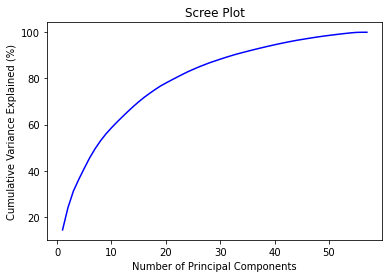

In [20]:
# Scree plot
var_pca = pd.DataFrame(var_pca, index=np.arange(1, 58))
plt.plot(var_pca, color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.show()

We observe that PCA is not conclusive. We can later remove predictors based on random forest feature importances.

#### 3.2.3 Test Data Normalization

In [12]:
y_test = test_df['class'].copy()
X_test = test_df.drop(columns='class')

In [13]:
test_norm_arr = scaler.transform(X_test)

## 4. Modeling: Random Forests
### 4.1 Hyperparameter Tuning using GridSearchCV

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [16]:
param_dict = {
    'n_estimators': [300, 500, 700],
    'max_features': [3, 5],
    'max_depth': [30, None],
    'max_samples': [None],
    'min_samples_leaf': [1],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=random_state)
model = RandomForestClassifier(n_jobs=-1, random_state=random_state)
model_grid = GridSearchCV(estimator=model, param_grid=param_dict, 
                          scoring=['roc_auc', 'balanced_accuracy', 'f1', 'precision', 'recall'], 
                          n_jobs=-1, cv=cv, refit='roc_auc', return_train_score=True)

In [17]:
search_rf = model_grid.fit(train_norm_arr, y)

### 4.3 Store model

In [19]:
import pickle
import os

def store_load_model(model_name, gs_obj=None):
    """
    Store or load fitted model
    :param model_name: Name of the model
    :param gs_obj: Fitted GridSearchCV object
    :return Loaded model if gs_obj is None
    """
    
    if not os.path.exists('Model'):
        os.makedirs('Model')
    if gs_obj:
        pickle.dump(gs_obj, open('Model/{}'.format(model_name), 'wb'))
    else:
        return pickle.load(open('Model/{}'.format(model_name), 'rb'))

In [21]:
store_load_model('RF', search_rf)

### 4.3 Error Metrics for Train, Validation, and Test data

In [15]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, precision_score, recall_score

def calc_error_metrics(gs_obj, X_test, y_test):
    """
    Calculate train, validation, and test error metrics
    :param gs_obj: Fitted GridSearchCV object
    :param X_test: X_test
    :param y_test: y_test
    :return Pandas dataframe containing the error metrics
    """
    
    roc_auc_list = []
    ba_list = []
    f1_list = []
    precision_list = []
    recall_list = []
    search_data = ['mean_train', 'mean_test']
    scores = gs_obj.cv_results_
    for sd in search_data:
        roc_auc = scores['{}_roc_auc'.format(sd)].mean()
        ba = scores['{}_balanced_accuracy'.format(sd)].mean()
        f1 = scores['{}_f1'.format(sd)].mean()
        precision = scores['{}_precision'.format(sd)].mean()
        recall = scores['{}_recall'.format(sd)].mean()
        roc_auc_list.append(roc_auc)
        ba_list.append(ba)
        f1_list.append(f1)
        precision_list.append(precision)
        recall_list.append(recall)
    best_model = gs_obj.best_estimator_
    y_pred = best_model.predict(X_test)
    roc_auc_list.append(roc_auc_score(y_test, y_pred))
    ba_list.append(balanced_accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    results_dict = {
        'Data': ['Train', 'Validation', 'Test'],
        'ROC_AUC': roc_auc_list,
        'Balanced_Accuracy': ba_list,
        'F1 Score': f1_list,
        'Precision': precision_list,
        'Recall': recall_list
    }
    results_df = pd.DataFrame(data=results_dict)
    return results_df
    

In [20]:
print(calc_error_metrics(search_rf, test_norm_arr, y_test))

         Data   ROC_AUC  Balanced_Accuracy  F1 Score  Precision    Recall
0       Train  0.999999           0.999300  0.999186   0.999352  0.999022
1  Validation  0.987201           0.945876  0.936812   0.952737  0.921548
2        Test  0.954367           0.954367  0.946878   0.960302  0.933824


In [23]:
print(search_rf.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 500}


### 4.4 Feature Importances / Dimensionality Reduction

In [25]:
fimp_dict = {'Feature': X.columns, 'fimp': search_rf.best_estimator_.feature_importances_}
fimp_df = pd.DataFrame(data=fimp_dict).sort_values(by='fimp', ascending=False).reset_index(drop=True)
fimp_df[np.round(fimp_df['fimp'], 2) >= 0.01]

,Feature,fimp
0,char_freq_!,0.077847
1,capital_run_length_average,0.065165
2,capital_run_length_longest,0.059191
3,word_freq_remove,0.054346
4,capital_run_length_total,0.053568
5,char_freq_$,0.053203
6,word_freq_your,0.048825
7,word_freq_free,0.047802
8,word_freq_hp,0.043074
9,word_freq_you,0.036822


In [26]:
selected_cols = fimp_df[np.round(fimp_df['fimp'], 2) >= 0.01]['Feature'].tolist()

In [27]:
X_reduced = X[selected_cols]
X_test_reduced = X_test[selected_cols]

In [28]:
scaler_reduced = MinMaxScaler()
X_reduced_norm = scaler_reduced.fit_transform(X_reduced)
X_test_reduced_norm = scaler_reduced.transform(X_test_reduced)

In [29]:
search_reduced = model_grid.fit(X_reduced_norm, y)

In [30]:
print(calc_error_metrics(search_reduced, X_test_reduced_norm, y_test))

         Data   ROC_AUC  Balanced_Accuracy  F1 Score  Precision    Recall
0       Train  0.999999           0.999462  0.999347   0.999347  0.999349
1  Validation  0.986786           0.945083  0.935967   0.952809  0.919859
2        Test  0.948255           0.948255  0.940075   0.958015  0.922794


In [31]:
print(search_reduced.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 700}


Removing dimensions does not help much. Since the number of samples are low (3202), the large number of features does not introduce significant computational overhead.

## 5. Modeling: LightGBM

In [16]:
from lightgbm import LGBMClassifier

In [58]:
param_dict = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.06, 0.05, 0.03, 0.02, 0.01],
    'max_depth': [10, 20, 30, -1],
    'class_weight': ['balanced'],
    'colsample_bytree': [1, 0.3, 0.5],
    'tree_learner': ['feature'],
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=random_state)
model = LGBMClassifier(random_state=random_state)
model_grid = GridSearchCV(estimator=model, param_grid=param_dict, 
                          scoring=['roc_auc', 'balanced_accuracy', 'f1', 'precision', 'recall'], 
                          n_jobs=-1, cv=cv, refit='roc_auc', return_train_score=True)

In [59]:
search_gbm = model_grid.fit(train_norm_arr, y)

In [60]:
print(calc_error_metrics(search_gbm, test_norm_arr, y_test))

         Data   ROC_AUC  Balanced_Accuracy  F1 Score  Precision    Recall
0       Train  0.998532           0.990555  0.988391   0.987540  0.989254
1  Validation  0.986586           0.948745  0.937922   0.938183  0.937790
2        Test  0.957263           0.957263  0.947754   0.945155  0.950368


In [61]:
print(search_gbm.best_params_)

{'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'tree_learner': 'feature'}


In [53]:
store_load_model('GBM', search_gbm)

LightGBM works best till now

## 6. Boosted Random Forests using LightGBM

In [30]:
param_dict = {
    'n_estimators': [500],
    'learning_rate': [0.05, 0.01],
    'max_depth': [10, 20, -1],
    'num_leaves': [31, 63],
    'min_data_in_leaf': [10, 20, 30],
    'subsample': [0.9, 0.5, 0.3],
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=random_state)
model = LGBMClassifier(
    boosting_type='rf', tree_learner='feature', 
    class_weight='balanced', bagging_freq=1,
    random_state=random_state
)
model_grid = GridSearchCV(estimator=model, param_grid=param_dict, 
                          scoring=['roc_auc', 'balanced_accuracy', 'f1', 'precision', 'recall'], 
                          n_jobs=-1, cv=cv, refit='roc_auc', return_train_score=True)

In [31]:
search_brf = model_grid.fit(train_norm_arr, y)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [32]:
print(calc_error_metrics(search_brf, test_norm_arr, y_test))

         Data   ROC_AUC  Balanced_Accuracy  F1 Score  Precision    Recall
0       Train  0.978393           0.923547  0.907221   0.905988  0.908613
1  Validation  0.964557           0.905444  0.885352   0.884922  0.886272
2        Test  0.926657           0.926657  0.910420   0.905455  0.915441


In [33]:
print(search_brf.best_params_)

{'bagging_fraction': 0.9, 'learning_rate': 0.05, 'max_depth': 20, 'min_data_in_leaf': 10, 'n_estimators': 500, 'num_leaves': 63}


In [28]:
store_load_model('BRF', search_brf)